In [1]:
from environment.models import SinusoidalControlledFixedEnv

import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = SinusoidalControlledFixedEnv(max_t=100, sinusoidal_components=1)
env.delta_t = 0.1
print(env.max_t)

100.0


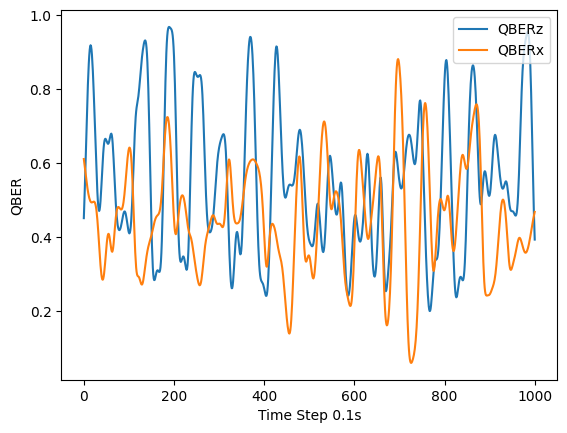

In [3]:
env.reset()

while not env.done:
    env.step()

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

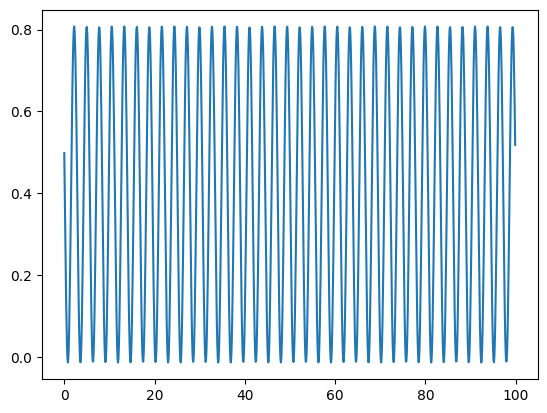

In [4]:
from environment.control import sinusoidal_control
from random import gauss

t = np.arange(0,env.max_t,env.delta_t)
_c = []
c = [np.array([gauss(0,1) for _ in range(4)])]
for i in range(len(t)):
    _c.append(sinusoidal_control(t[i], c))
plt.plot(t,_c)

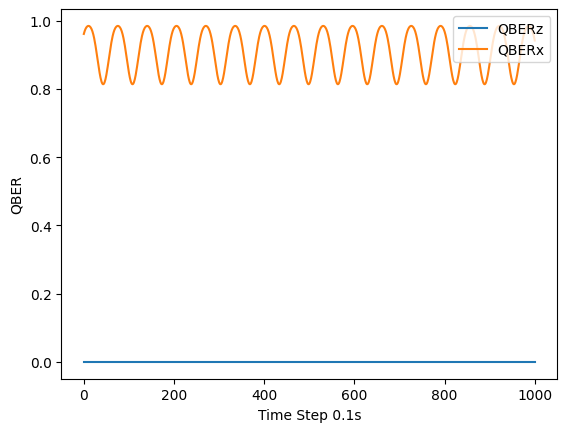

In [5]:
env.fixed_errors_flags = [True, True, True, True,
                          False, True, True, True,
                          True, True, True, True]

env.reset()

while not env.done:
    env.step()

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

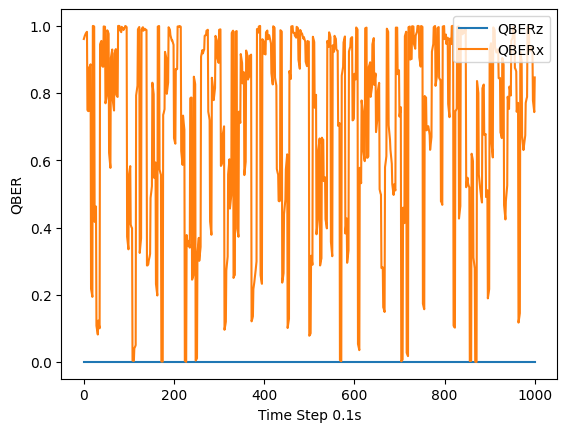

In [6]:
env.reset()

while not env.done:
    c = [gauss(0,1) for _ in range(4)]
    env.step(a_alice=[np.array(c), np.zeros(4), np.zeros(4), np.zeros(4)])

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()